In [1]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='%(message)s', stream=sys.stdout)

In [2]:
# Рассчитываем частоты, которые нужно выставить (примерно), чтобы получилось 5, 6 и 7 резонансов
mu = ml.PQ(29*10**(-3)*u.kg/u.mol, is_const=True)
T = ml.PQ(ml.celsium_to_kelvins(22.6), sigma=0.5*u.kelvins) # Комнатная
delta_L_max = ml.PQ(23*u.cm, sigma=0.1*u.cm)
v_sound_estim = ml.PQ(330*u.m/u.s, sigma=1*u.m/u.s)
f_s = [(v_sound_estim*n/delta_L_max/2).repr_as(u.hz) for n in [5, 6, 7]]
f_s

[3586.956522±19.009627 hertz (0.005300),
 4304.347826±22.811552 hertz (0.005300),
 5021.739130±26.613478 hertz (0.005300)]

[ 48.7 -28.7] [0.077459666923819573, 0.15491933384763915]
344.698600±0.274131 meter/second (0.000795)
1.401258±0.003253 1 (0.002321)
[ 36.18571429 -25.4       ] [0.050843229772794263, 0.14829275350398324]
346.659143±0.243540 meter/second (0.000703)
1.417244±0.003115 1 (0.002198)
[ 33.53571429  -7.14285714] [0.33475764698624083, 1.3390305879449633]
351.454286±1.754130 meter/second (0.004991)
1.456723±0.014748 1 (0.010124)


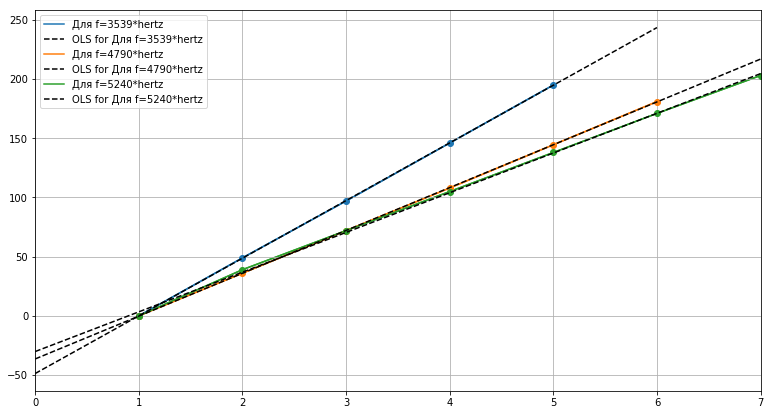

In [3]:
# Частоты
f_s = np.array([ml.PQ(val*u.hz, sigma=0.01*u.hz) for val in 
                     [3539, 4790, 5240]])
# Длины трубы (по шкале)
L_s = [ np.array([ml.PQ(val*u.mm, sigma=0.5*u.mm) for val in 
                     [20, 69, 117, 166, 215]]),
        np.array([ml.PQ(val*u.mm, sigma=0.5*u.mm) for val in 
                     [11, 47, 83, 119, 155.5, 192]]),
        np.array([ml.PQ(val*u.mm, sigma=0.5*u.mm) for val in 
                     [23, 62, 95, 128, 161, 194, 226]])]

plt.figure(figsize=(13, 7))
plt.xlim(0, 7)
for L, f in zip(L_s, f_s):
    grid = np.arange(1, len(L)+1, 1)
    ml.plt_pq(grid, L-L[0], label='Для f=%s'%f.val, ols=True)
    
    ols_coefs, ols_errors = ml.OLS(grid, L)
    print(ols_coefs, ols_errors)
    
    lambd = ml.PQ(2*ols_coefs[0]*L[0].dim, sigma=ols_errors[0]*L[0].dim)#(L[-1]-L[0])/len(L)
    v_sound = (lambd*f).repr_as(u.m/u.s)
    print(v_sound)
    gamma = (mu/(u.R*T)*v_sound**2).repr_as(1)
    print(gamma)
plt.show()

307.706800±0.415820 meter/second (0.001351)
1.123096±0.003036 1 (0.002703)
356.732857±0.482071 meter/second (0.001351)
1.417417±0.003831 1 (0.002703)
287.796571±0.388914 meter/second (0.001351)
0.867413±0.002345 1 (0.002703)


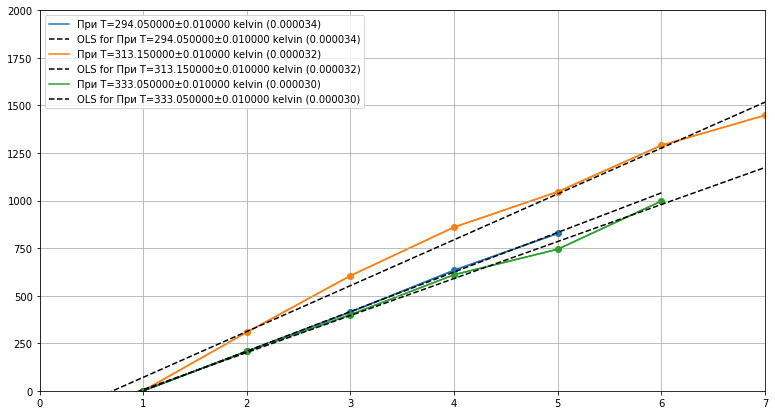

In [4]:
# Длина трубы
L = ml.PQ(740*u.mm, sigma=1*u.mm) 
# Температуры
T_s = [ml.PQ(ml.celsium_to_kelvins(20.9), sigma=0.01*u.kelvins),
       ml.PQ(ml.celsium_to_kelvins(40.0), sigma=0.01*u.kelvins),
       ml.PQ(ml.celsium_to_kelvins(59.9), sigma=0.01*u.kelvins)]
# Частоты
f_s = [np.array([ml.PQ(val*u.hz, sigma=0.1*u.hz, dim=u.hz) for val in 
                     [206.1, 414.3, 620.0, 839.6, 1033.0]]),
       np.array([ml.PQ(val*u.hz, sigma=1*u.hz, dim=u.hz) for val in 
                     [260, 568, 865, 1120, 1306, 1550, 1708]]),
       np.array([ml.PQ(val*u.hz, sigma=1*u.hz, dim=u.hz) for val in 
                     [260.0, 467, 660, 870, 1004, 1257]])]

plt.figure(figsize=(13, 7))
plt.xlim(0, 7)
plt.ylim(ymin=0, ymax=2000)
for T, f in zip(T_s, f_s):
    grid = np.arange(1, len(f)+1, 1)
    ml.plt_pq(grid, f-f[0], ols=True, label='При T=%s'%T)
    ols_coefs, ols_errors = ml.OLS(grid, f)
    v_sound = (2*L*ols_coefs[0]*u.hz).repr_as(u.m/u.s)
    print(v_sound)
    gamma = (mu/(u.R*T)*v_sound**2).repr_as(1)
    print(gamma)
plt.show()